In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import class_weight
import numpy as np

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632772205&Signature=A8H5cqJ46ymXY3eqNmQr4KNH2YDk%2Fk7CM8S49nANlteyOa%2BLi84z0ke%2FLFMM8zNzlKZOt3w4t84xpzctHXjpJxVjO4dchrkOZZvIVJoaCR2pkHOxr9SvQ6PGlUFoP0UM7j%2BzvGvValUXhdyMi8I76KZ1%2BUKIpyTR65LfCkgrrYV3%2Bh9Jbt%2B3xCt5uWRCenmjsVRVePbVSD68rbB3z%2BIYgIRjQcM9iwVFOCd5aVh%2B%2FWMkAzbldgsDDnBuK5hKEYjBXHlvmqjhO77%2BhSr6fKaI5YjWPekJoGzsyjKkGM7Yq0nFFWcjzX%2B4x0BdHZiFWR14%2BxJKptUtsD1HOG5eCwZdwA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip" -c -O 'train_images.zip'

--2021-09-25 07:10:51--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632772205&Signature=A8H5cqJ46ymXY3eqNmQr4KNH2YDk%2Fk7CM8S49nANlteyOa%2BLi84z0ke%2FLFMM8zNzlKZOt3w4t84xpzctHXjpJxVjO4dchrkOZZvIVJoaCR2pkHOxr9SvQ6PGlUFoP0UM7j%2BzvGvValUXhdyMi8I76KZ1%2BUKIpyTR65LfCkgrrYV3%2Bh9Jbt%2B3xCt5uWRCenmjsVRVePbVSD68rbB3z%2BIYgIRjQcM9iwVFOCd5aVh%2B%2FWMkAzbldgsDDnBuK5hKEYjBXHlvmqjhO77%2BhSr6fKaI5YjWPekJoGzsyjKkGM7Yq0nFFWcjzX%2B4x0BdHZiFWR14%2BxJKptUtsD1HOG5eCwZdwA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8602291542 (8.0G) [application/zip]
Saving to: ‘train_images.zip’



In [ ]:
import shutil
shutil.unpack_archive('train_images.zip','data')

In [2]:
#loading our data
df=pd.read_csv("train.csv")
print(df)

           id_code  diagnosis
0     000c1434d8d7          2
1     001639a390f0          4
2     0024cdab0c1e          1
3     002c21358ce6          0
4     005b95c28852          0
...            ...        ...
3657  ffa47f6a7bf4          2
3658  ffc04fed30e6          0
3659  ffcf7b45f213          2
3660  ffd97f8cd5aa          0
3661  ffec9a18a3ce          2

[3662 rows x 2 columns]


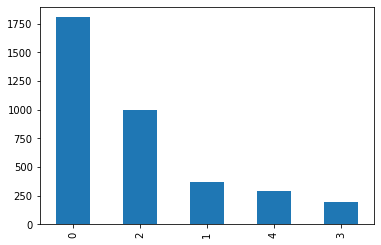

In [3]:
v=df['diagnosis'].value_counts().plot(kind='bar')

In [4]:
df.dtypes

id_code      object
diagnosis     int64
dtype: object

In [5]:
# creating a column with extension of .png , as id_code column contain only id
df['add']=df['id_code']+'.png'

In [6]:
df.head()

id_code  diagnosis               add
0  000c1434d8d7          2  000c1434d8d7.png
1  001639a390f0          4  001639a390f0.png
2  0024cdab0c1e          1  0024cdab0c1e.png
3  002c21358ce6          0  002c21358ce6.png
4  005b95c28852          0  005b95c28852.png

In [7]:
df.dtypes

id_code      object
diagnosis     int64
add          object
dtype: object

In [8]:
#creating a column to keep the path of the unzipped data which contain respective images  path
df['path']='data/'+df['add']

In [9]:
print(df)

           id_code  diagnosis               add                   path
0     000c1434d8d7          2  000c1434d8d7.png  data/000c1434d8d7.png
1     001639a390f0          4  001639a390f0.png  data/001639a390f0.png
2     0024cdab0c1e          1  0024cdab0c1e.png  data/0024cdab0c1e.png
3     002c21358ce6          0  002c21358ce6.png  data/002c21358ce6.png
4     005b95c28852          0  005b95c28852.png  data/005b95c28852.png
...            ...        ...               ...                    ...
3657  ffa47f6a7bf4          2  ffa47f6a7bf4.png  data/ffa47f6a7bf4.png
3658  ffc04fed30e6          0  ffc04fed30e6.png  data/ffc04fed30e6.png
3659  ffcf7b45f213          2  ffcf7b45f213.png  data/ffcf7b45f213.png
3660  ffd97f8cd5aa          0  ffd97f8cd5aa.png  data/ffd97f8cd5aa.png
3661  ffec9a18a3ce          2  ffec9a18a3ce.png  data/ffec9a18a3ce.png

[3662 rows x 4 columns]


(-0.5, 2047.5, 1535.5, -0.5)

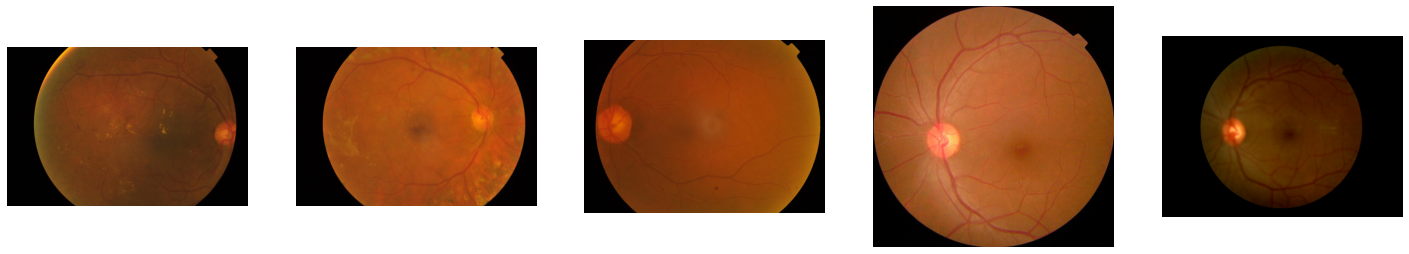

In [ ]:
#lets display the retina images 
plt.figure(figsize=(25,25)) 
plt.subplot(151)
im = plt.imread(df['path'][0])
plt.imshow(im)
plt.axis('off')

plt.subplot(152)
im = plt.imread(df['path'][1])
plt.imshow(im)
plt.axis('off')

plt.subplot(153)
im = plt.imread(df['path'][2])
plt.imshow(im)
plt.axis('off')

plt.subplot(154)
im = plt.imread(df['path'][3])
plt.imshow(im)
plt.axis('off')

plt.subplot(155)
im = plt.imread(df['path'][4])
plt.imshow(im)
plt.axis('off')



In [10]:
#ref : - https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy

def crop(img,tol=7):
 # here tol is tolerance  
  '''
  this crop function is used for removing darkparts arounds the image
  '''

  if img.ndim==2:
# this loop is used for cropping GRAY images
    mask=img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]
  elif img.ndim==3:
# this loop is used for cropping color images    
    grayimg=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    mask=grayimg>tol
    shap=img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
    if shap==0:
# image is too dark so that we crop out everything   
      return img
    else:
      img0=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
      img1=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
      img2=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
      img=np.stack([img0,img1,img2],axis=-1)
    return img 

In [11]:
def circlecrop(img):
  '''
  used for cropping image in a circular way from image centre
  '''

  h,w,d= img.shape
  x = int(w/2)
  y = int(h/2)
  r = np.amin((x,y))
  circle_img = np.zeros((h,w), np.uint8)
  cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
  img = cv2.bitwise_and(img, img, mask=circle_img) 
  return img

In [12]:
def ben(img,sigmaX=10):
  '''
  Ben Graham's method to improve lighting condition.

  '''
  image=cv2.addWeighted( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
  return image

In [13]:
# creating a colum which contains path of preprocessed images
df['preppath']='prep/'+df['add']

In [14]:
print(df)

           id_code  diagnosis  ...                   path               preppath
0     000c1434d8d7          2  ...  data/000c1434d8d7.png  prep/000c1434d8d7.png
1     001639a390f0          4  ...  data/001639a390f0.png  prep/001639a390f0.png
2     0024cdab0c1e          1  ...  data/0024cdab0c1e.png  prep/0024cdab0c1e.png
3     002c21358ce6          0  ...  data/002c21358ce6.png  prep/002c21358ce6.png
4     005b95c28852          0  ...  data/005b95c28852.png  prep/005b95c28852.png
...            ...        ...  ...                    ...                    ...
3657  ffa47f6a7bf4          2  ...  data/ffa47f6a7bf4.png  prep/ffa47f6a7bf4.png
3658  ffc04fed30e6          0  ...  data/ffc04fed30e6.png  prep/ffc04fed30e6.png
3659  ffcf7b45f213          2  ...  data/ffcf7b45f213.png  prep/ffcf7b45f213.png
3660  ffd97f8cd5aa          0  ...  data/ffd97f8cd5aa.png  prep/ffd97f8cd5aa.png
3661  ffec9a18a3ce          2  ...  data/ffec9a18a3ce.png  prep/ffec9a18a3ce.png

[3662 rows x 5 columns]


In [ ]:
# save image by applying crop function
for i in range(0,5):
  img=cv2.imread(df['path'][i])
  img=crop(img)
  cv2.imwrite(os.path.join('/content/prep',df['add'][i]),img)

(-0.5, 1375.5, 1377.5, -0.5)

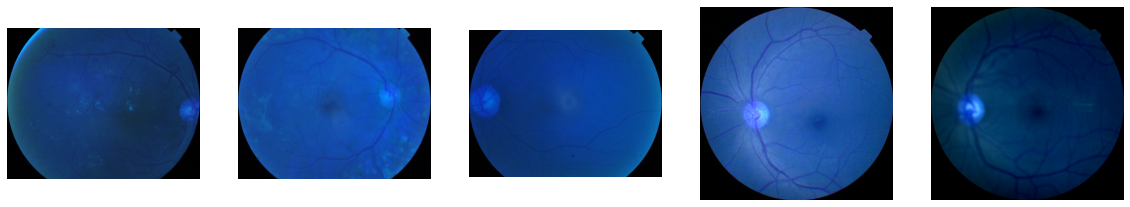

In [ ]:
plt.figure(figsize=(20,20)) 
plt.subplot(151)
im = cv2.imread(df['preppath'][0])
plt.imshow(im)
plt.axis('off')

plt.subplot(152)
im = cv2.imread(df['preppath'][1])
plt.imshow(im)
plt.axis('off')

plt.subplot(153)
im = cv2.imread(df['preppath'][2])
plt.imshow(im)
plt.axis('off')

plt.subplot(154)
im = cv2.imread(df['preppath'][3])
plt.imshow(im)
plt.axis('off')

plt.subplot(155)
im = cv2.imread(df['preppath'][4])
plt.imshow(im)
plt.axis('off')



In [ ]:
# save image by applying circlecrop function
for i in range(0,5):
  img1=cv2.imread(df['preppath'][i])
  image = cv2.resize(img1, (512,512))
  img1=circlecrop(image)
  cv2.imwrite(os.path.join('/content/prep',a[i]),img1)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

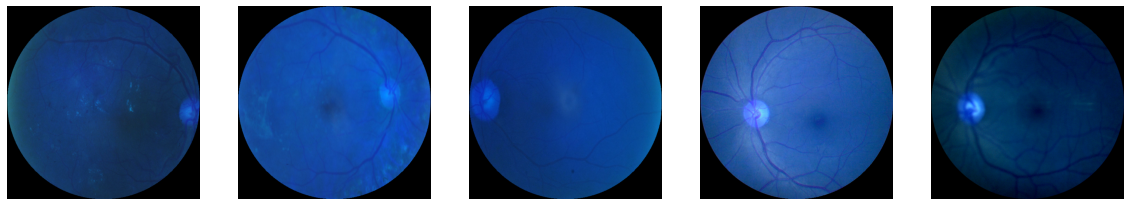

In [ ]:
plt.figure(figsize=(20,20)) 
plt.subplot(151)
im = cv2.imread(df['preppath'][0])
print(im.shape)
plt.imshow(im)
plt.axis('off')

plt.subplot(152)
im = cv2.imread(df['preppath'][1])
print(im.shape)
plt.imshow(im)
plt.axis('off')

plt.subplot(153)
im = cv2.imread(df['preppath'][2])
print(im.shape)
plt.imshow(im)
plt.axis('off')

plt.subplot(154)
im = cv2.imread(df['preppath'][3])
print(im.shape)
plt.imshow(im)
plt.axis('off')

plt.subplot(155)
im = cv2.imread(df['preppath'][4])
print(im.shape)
plt.imshow(im)
plt.axis('off')



In [ ]:
# save image by applying ben graham's function
for i in range(0,5):
  img1=cv2.imread(df['preppath'][i])
#  image = cv2.resize(img1, (512,512))
  img=ben(img1)
  cv2.imwrite(os.path.join('/content/prep',a[i]),img)

(-0.5, 511.5, 511.5, -0.5)

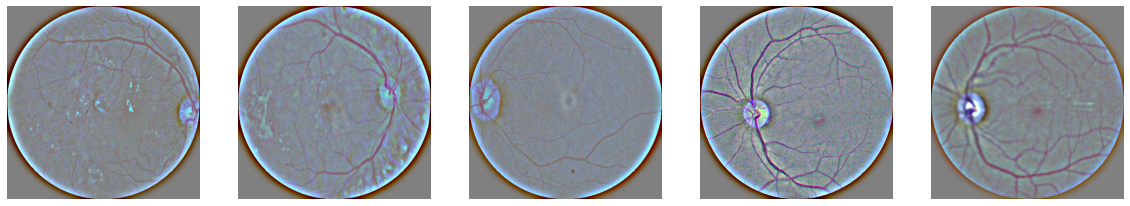

In [ ]:
plt.figure(figsize=(20,20)) 
plt.subplot(151)
im = cv2.imread(df['preppath'][0])
plt.imshow(im)
plt.axis('off')

plt.subplot(152)
im = cv2.imread(df['preppath'][1])
plt.imshow(im)
plt.axis('off')

plt.subplot(153)
im = cv2.imread(df['preppath'][2])
plt.imshow(im)
plt.axis('off')

plt.subplot(154)
im = cv2.imread(df['preppath'][3])
plt.imshow(im)
plt.axis('off')

plt.subplot(155)
im = cv2.imread(df['preppath'][4])
plt.imshow(im)
plt.axis('off')



In [ ]:
# applying all the preprocessing function on all the images
for i in range(0,df.shape[0]):
  img=cv2.imread(df['path'][i])
  img=crop(img)
  image = cv2.resize(img, (512,512))
  img1=circlecrop(image)
  img=ben(img1)
  cv2.imwrite(os.path.join('/content/prep',df['add'][i]),img)

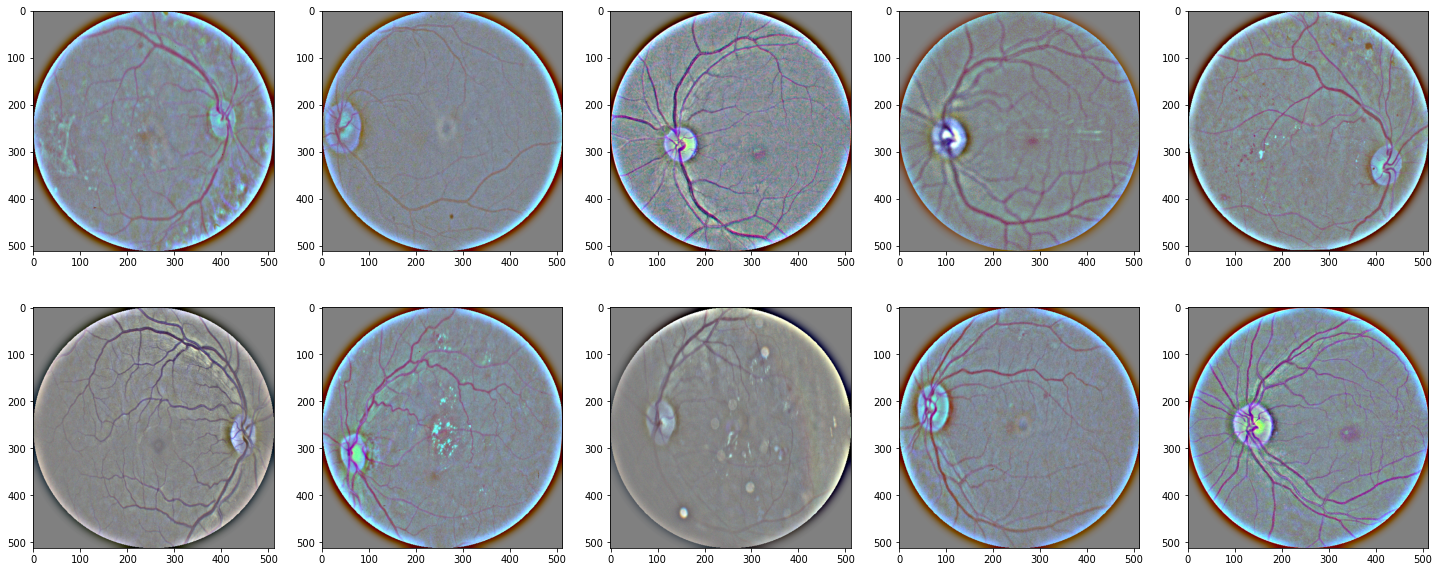

In [ ]:
fig=plt.figure(figsize=(25,10)) 
r=2
c=5
#fig = plt.figure(figsize=(8, 8))
for i in range(1,11):
  fig.add_subplot(r,c,i)
  im = cv2.imread(df['preppath'][i])
  plt.imshow(im)
plt.show()

In [16]:
!wget --header="Host: doc-14-a0-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_6rpvhtlctcod670qena37lg288qrpqdv_nonce=iohvcet6a66km" --header="Connection: keep-alive" "https://doc-14-a0-docs.googleusercontent.com/docs/securesc/4rj63732m789casndtspho0tu1jcklo5/1abdukob1oo6mtji46dp46igu02jsf53/1633973175000/14877422438580229739/14877422438580229739/1wWyByDM1Yc130h1SwnL1w86IEZwSGEOX?e=download&authuser=0&nonce=iohvcet6a66km&user=14877422438580229739&hash=a18i4pntp275ffs8tbpe9icflvmalec8" -c -O 'prepfolder.zip'

--2021-10-11 17:26:44--  https://doc-14-a0-docs.googleusercontent.com/docs/securesc/4rj63732m789casndtspho0tu1jcklo5/1abdukob1oo6mtji46dp46igu02jsf53/1633973175000/14877422438580229739/14877422438580229739/1wWyByDM1Yc130h1SwnL1w86IEZwSGEOX?e=download&authuser=0&nonce=iohvcet6a66km&user=14877422438580229739&hash=a18i4pntp275ffs8tbpe9icflvmalec8
Resolving doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1135568547 (1.1G) [application/zip]
Saving to: ‘prepfolder.zip’

prepfolder.zip      100%[===================>]   1.06G   151MB/s    in 7.0s    

2021-10-11 17:26:51 (154 MB/s) - ‘prepfolder.zip’ saved [1135568547/1135568547]



In [17]:
import shutil
shutil.unpack_archive('prepfolder.zip')

In [18]:
df.head()

id_code  diagnosis  ...                   path               preppath
0  000c1434d8d7          2  ...  data/000c1434d8d7.png  prep/000c1434d8d7.png
1  001639a390f0          4  ...  data/001639a390f0.png  prep/001639a390f0.png
2  0024cdab0c1e          1  ...  data/0024cdab0c1e.png  prep/0024cdab0c1e.png
3  002c21358ce6          0  ...  data/002c21358ce6.png  prep/002c21358ce6.png
4  005b95c28852          0  ...  data/005b95c28852.png  prep/005b95c28852.png

[5 rows x 5 columns]

In [19]:
df['diagnosis']=df['diagnosis'].astype(str)

As our dataset is very small, we may lead in overfitting , in order to overcome this scenario we need to increase our training data , our data can be increased by using augmentation techniques like horizontal flipping , Vertical flipping ,rotating images ,zooming and setting brightness


In [20]:
from keras_preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=360,
                           brightness_range=[0.5, 1],
                           zoom_range = 0.2,rescale=1./255.,validation_split=0.25)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="prep",
x_col="add",
y_col="diagnosis",
subset="training",
batch_size=12,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(256, 256))

Found 2747 validated image filenames belonging to 5 classes.


In [21]:
valid_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="prep",
x_col="add",
y_col="diagnosis",
subset="validation",
batch_size=12,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(256, 256))

Found 915 validated image filenames belonging to 5 classes.


In [ ]:
print(len(valid_generator))

77


(64, 256, 256, 3)


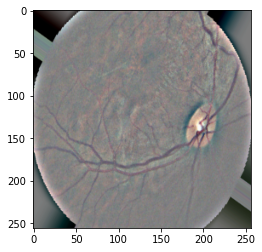

(64, 256, 256, 3)


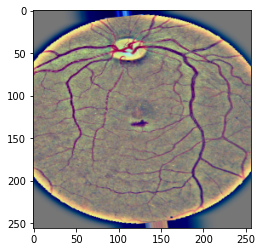

(64, 256, 256, 3)


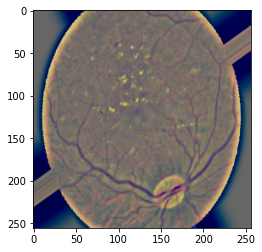

(64, 256, 256, 3)


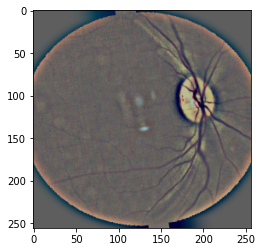

(64, 256, 256, 3)


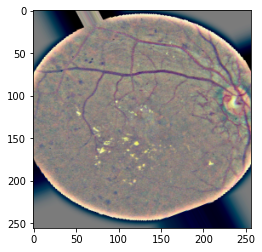

In [ ]:
for i in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

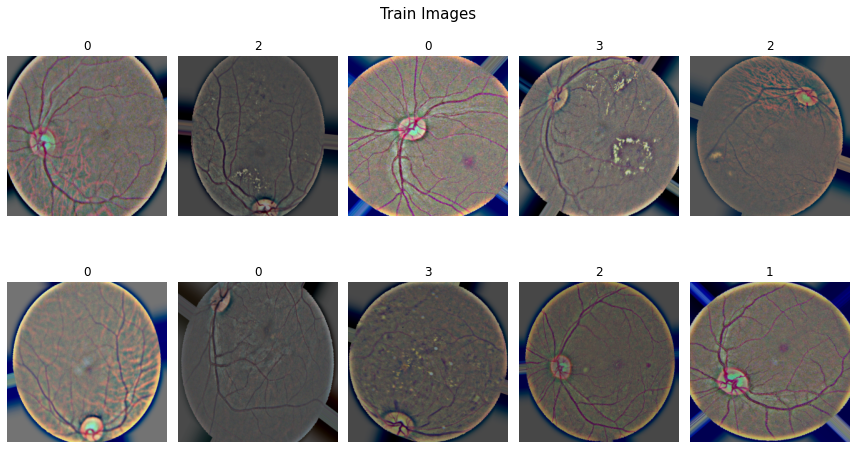

In [ ]:

for i, j in train_generator:
  break

fig, axes = plt.subplots(2, 5, figsize=(12, 7))
fig.suptitle('Train Images', fontsize=15)
axes = axes.flatten()
for img, lbl, ax in zip(i[:10], j[:10], axes):
    ax.imshow(img)
    ax.title.set_text(str(int(np.argmax(lbl))))
    ax.axis('off')
plt.tight_layout()
plt.show()

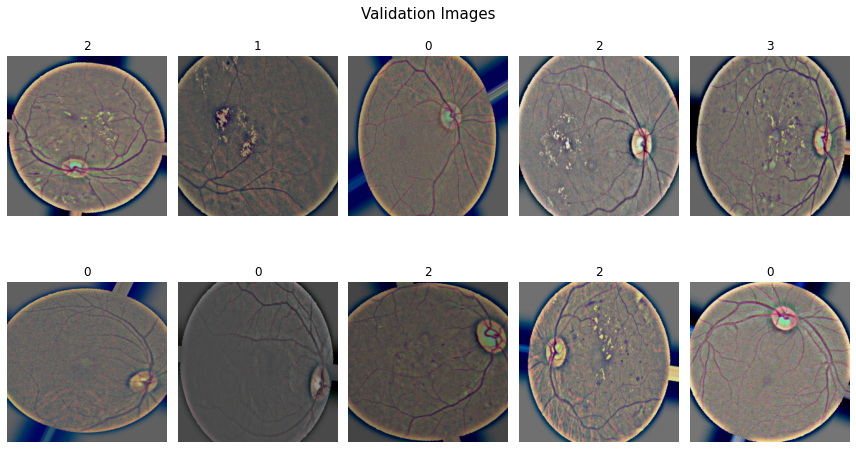

In [ ]:

for i, j in valid_generator:
  break

fig, axes = plt.subplots(2, 5, figsize=(12, 7))
fig.suptitle('Validation Images', fontsize=15)
axes = axes.flatten()
for img, lbl, ax in zip(i[:10], j[:10], axes):
    ax.imshow(img)
    ax.title.set_text(str(int(np.argmax(lbl))))
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df['id_code']
y=df['diagnosis'].values

In [ ]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
print(y_test)

['2' '2' '0' '0' '0' '1' '4' '0' '0' '2' '0' '2' '2' '3' '2' '3' '0' '2'
 '3' '2' '0' '0' '2' '1' '0' '0' '2' '0' '2' '2' '2' '3' '0' '3' '0' '0'
 '0' '3' '0' '0' '2' '0' '0' '2' '2' '0' '2' '2' '0' '0' '2' '0' '0' '0'
 '2' '4' '0' '2' '0' '0' '1' '2' '0' '2' '2' '1' '1' '0' '0' '2' '4' '2'
 '2' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '2' '2' '2' '4' '0' '0' '2'
 '0' '0' '2' '0' '0' '0' '0' '2' '0' '2' '2' '0' '2' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '1' '0' '2' '0' '0' '0' '1' '1' '2' '0' '0' '0'
 '2' '4' '4' '2' '0' '0' '2' '2' '0' '2' '0' '2' '3' '0' '1' '0' '0' '0'
 '4' '0' '2' '2' '0' '0' '1' '0' '0' '0' '0' '3' '0' '1' '2' '1' '1' '4'
 '2' '0' '0' '3' '0' '0' '0' '2' '2' '1' '0' '2' '0' '0' '0' '0' '1' '0'
 '4' '0' '4' '0' '2' '0' '3' '0' '1' '2' '0' '2' '4' '3' '0' '1' '2' '2'
 '4' '2' '2' '3' '2' '0' '0' '0' '0' '4' '0' '2' '2' '2' '0' '0' '0' '3'
 '3' '2' '0' '4' '2' '0' '4' '0' '3' '4' '4' '0' '0' '2' '2' '2' '0' '2'
 '2' '0' '4' '2' '2' '1' '0' '0' '0' '3' '2' '3' '0

In [ ]:
print(len(y_test))

916


In [22]:
from keras.callbacks import Callback, ModelCheckpoint

In [23]:
from sklearn.metrics import cohen_kappa_score

In [24]:
def kappa(y_true, y_pred):
  y_true = np.argmax(y_true, axis=-1)
  y_pred = np.argmax(y_pred, axis=-1)
  kappa_score = cohen_kappa_score(y_true, y_pred, weights='quadratic')
  return kappa_score

def kappa_metric(y_true, y_pred):
  kappa_score = tf.py_function(func=kappa, inp=[y_true, y_pred], Tout=tf.float32)
  return kappa_score

#My Base model


In [ ]:
inp=Input(shape=(256,256,3))
x=Conv2D(32,(3,3),activation='relu')(inp)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=BatchNormalization()(x)
x=Dense(5, activation='softmax')(x)

modelbase=Model(inputs=inp,outputs=x)
modelbase.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_base.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
modelbase.summary()

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 516128)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 516128)            2064512   
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 258

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
histb=modelbase.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
228/228 [==============================] - 81s 355ms/step - loss: 1.1636 - accuracy: 0.6044 - kappa_metric: 0.4945 - val_loss: 1.1562 - val_accuracy: 0.6173 - val_kappa_metric: 0.5429

Epoch 00001: val_kappa_metric did not improve from 0.56836
Epoch 2/30
228/228 [==============================] - 81s 355ms/step - loss: 1.1904 - accuracy: 0.6146 - kappa_metric: 0.5290 - val_loss: 1.7111 - val_accuracy: 0.4408 - val_kappa_metric: 0.3956

Epoch 00002: val_kappa_metric did not improve from 0.56836
Epoch 3/30
228/228 [==============================] - 82s 358ms/step - loss: 1.2213 - accuracy: 0.6007 - kappa_metric: 0.4901 - val_loss: 1.1349 - val_accuracy: 0.6129 - val_kappa_metric: 0.5648

Epoch 00003: val_kappa_metric did not improve from 0.56836
Epoch 4/30
228/228 [==============================] - 80s 352ms/step - loss: 1.2464 - accuracy: 0.5909 - kappa_metric: 0.5077 - val_loss: 1.1769 - val_accuracy: 0.6064 - val_kappa_metric: 0.5477

Epoch 00004: val_kappa_metric did not i

In [ ]:
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(dataframe=df,
                                                          directory = "prep",
                                                          x_col="add",
                                                          target_size=(256,256),
                                                          batch_size=1,
                                                          shuffle=False,
                                                          class_mode=None)

STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = modelbase.predict_generator(complete_generator, steps=STEP_SIZE_COMPLETE,verbose = 1)
train_preds = [np.argmax(pred) for pred in train_preds]

Found 3662 validated image filenames.
  15/3662 [..............................] - ETA: 29s

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3662/3662 [==============================] - 30s 8ms/step


In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds, df['diagnosis'].astype('int'), weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score(df['diagnosis'].astype('int'),train_preds))

Train Cohen Kappa score: 0.554
Train Accuracy score : 0.61


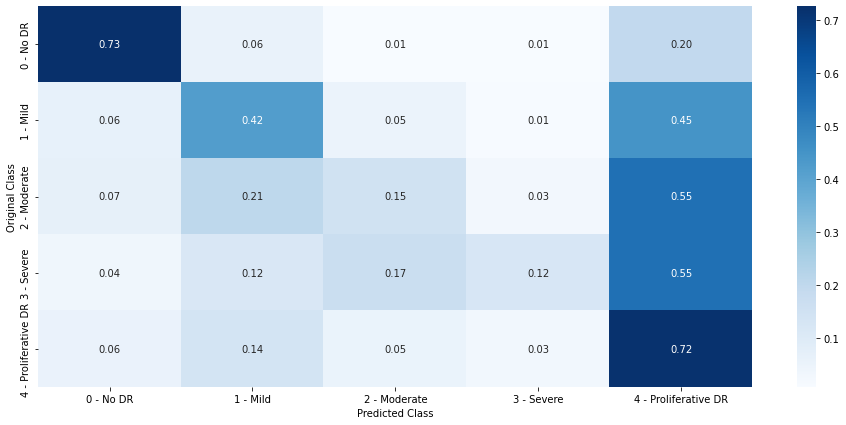

In [ ]:
cnf_matrix = confusion_matrix(df['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))

sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#vgg

In [ ]:
import tensorflow as tf

In [ ]:
from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

model_vgg16= VGG16(weights='imagenet', include_top=False,input_shape=(256,256, 3))



In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras import optimizers


x=GlobalAveragePooling2D()(model_vgg16.layers[-1].output)
x=Dropout(0.5)(x)
x=Dense(5, activation='softmax')(x)

model1=Model(inputs=model_vgg16.input,outputs=x)
model1.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_vgg.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model1.summary()

Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
hist1=model1.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 89s 386ms/step - loss: 1.2202 - accuracy: 0.5503 - kappa_metric: 0.3120 - val_loss: 1.0470 - val_accuracy: 0.6173 - val_kappa_metric: 0.4358

Epoch 00001: val_kappa_metric improved from -inf to 0.43580, saving model to model/model_vgg.hdf5
Epoch 2/40
228/228 [==============================] - 87s 379ms/step - loss: 0.8261 - accuracy: 0.7020 - kappa_metric: 0.6915 - val_loss: 0.7347 - val_accuracy: 0.7401 - val_kappa_metric: 0.7789

Epoch 00002: val_kappa_metric improved from 0.43580 to 0.77886, saving model to model/model_vgg.hdf5
Epoch 3/40
228/228 [==============================] - 87s 379ms/step - loss: 0.7098 - accuracy: 0.7386 - kappa_metric: 0.7532 - val_loss: 0.7014 - val_accuracy: 0.7390 - val_kappa_metric: 0.7719

Epoch 00003: val_kappa_metric did not improve from 0.77886
Epoch 4/40
228/228 [==============================] - 85s 374ms/step - loss: 0.7072 - accuracy: 0.7320 - kappa_metric: 0.7679 - val_loss: 0.6624 - val_acc

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


228/228 [==============================] - 85s 374ms/step - loss: 0.6553 - accuracy: 0.7452 - kappa_metric: nan - val_loss: 0.6071 - val_accuracy: 0.7654 - val_kappa_metric: 0.8125

Epoch 00005: val_kappa_metric improved from 0.79732 to 0.81253, saving model to model/model_vgg.hdf5
Epoch 6/40
228/228 [==============================] - 85s 374ms/step - loss: 0.6393 - accuracy: 0.7590 - kappa_metric: 0.7919 - val_loss: 0.6128 - val_accuracy: 0.7708 - val_kappa_metric: 0.8099

Epoch 00006: val_kappa_metric did not improve from 0.81253
Epoch 7/40
228/228 [==============================] - 85s 373ms/step - loss: 0.6586 - accuracy: 0.7521 - kappa_metric: 0.7977 - val_loss: 0.6162 - val_accuracy: 0.7599 - val_kappa_metric: 0.8067

Epoch 00007: val_kappa_metric did not improve from 0.81253
Epoch 8/40
228/228 [==============================] - 85s 372ms/step - loss: 0.6195 - accuracy: 0.7503 - kappa_metric: 0.8058 - val_loss: 0.7072 - val_accuracy: 0.7357 - val_kappa_metric: 0.7859

Epoch 00008

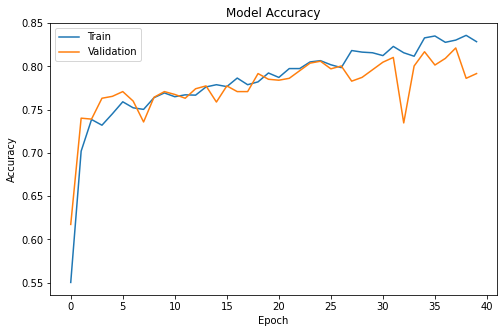

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [ ]:
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(dataframe=df,
                                                          directory = "prep",
                                                          x_col="add",
                                                          target_size=(256,256),
                                                          batch_size=1,
                                                          shuffle=False,
                                                          class_mode=None)

STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = model1.predict_generator(complete_generator, steps=STEP_SIZE_COMPLETE,verbose = 1)
train_preds = [np.argmax(pred) for pred in train_preds]

Found 3662 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3662/3662 [==============================] - 33s 9ms/step


In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds, df['diagnosis'].astype('int'), weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score(df['diagnosis'].astype('int'),train_preds))

Train Cohen Kappa score: 0.913
Train Accuracy score : 0.817


In [ ]:
import seaborn as sns

In [ ]:

labels = ['0', '1', '2', '3', '4']

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

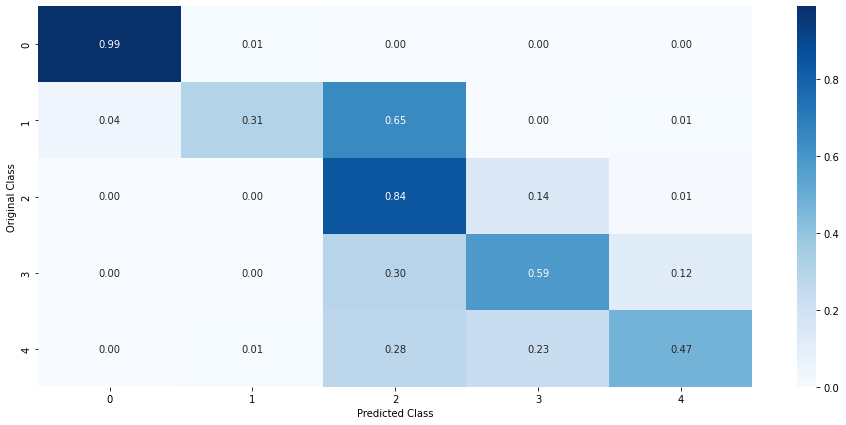

In [ ]:
cnf_matrix = confusion_matrix(df['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))

sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#Densenet

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

In [ ]:
from keras.applications.densenet import DenseNet121



#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

modeldense=DenseNet121(weights='imagenet', include_top=False,input_shape=(256,256, 3))

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras import optimizers

x=GlobalAveragePooling2D()(modeldense.layers[-1].output)
x=Dropout(0.5)(x)
x=Dense(5, activation='softmax')(x)

model2=Model(inputs=modeldense.input,outputs=x)
model2.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])

filepath="model/model_dense.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
import tensorflow as tf

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
hist2=model2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 104s 338ms/step - loss: 0.9986 - accuracy: 0.6508 - kappa_metric: 0.6613 - val_loss: 0.6602 - val_accuracy: 0.7445 - val_kappa_metric: 0.7706

Epoch 00001: val_kappa_metric improved from -inf to 0.77062, saving model to model/model_dense.hdf5
Epoch 2/40
228/228 [==============================] - 75s 328ms/step - loss: 0.7032 - accuracy: 0.7459 - kappa_metric: 0.8000 - val_loss: 0.6622 - val_accuracy: 0.7292 - val_kappa_metric: 0.8313

Epoch 00002: val_kappa_metric improved from 0.77062 to 0.83135, saving model to model/model_dense.hdf5
Epoch 3/40
228/228 [==============================] - 75s 328ms/step - loss: 0.6180 - accuracy: 0.7689 - kappa_metric: 0.8276 - val_loss: 0.5662 - val_accuracy: 0.7939 - val_kappa_metric: 0.8272

Epoch 00003: val_kappa_metric did not improve from 0.83135
Epoch 4/40
228/228 [==============================] - 74s 326ms/step - loss: 0.5699 - accuracy: 0.7912 - kappa_metric: 0.8494 - val_loss: 0.5877 - va

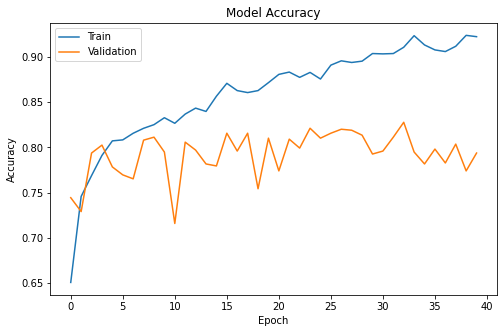

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [ ]:
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(dataframe=df,
                                                          directory = "prep",
                                                          x_col="add",
                                                          target_size=(256,256),
                                                          batch_size=1,
                                                          shuffle=False,
                                                          class_mode=None)

STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = model2.predict_generator(complete_generator, steps=STEP_SIZE_COMPLETE,verbose = 1)
train_preds = [np.argmax(pred) for pred in train_preds]

Found 3662 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3662/3662 [==============================] - 69s 18ms/step


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds, df['diagnosis'].astype('int'), weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score(df['diagnosis'].astype('int'),train_preds))

Train Cohen Kappa score: 0.933
Train Accuracy score : 0.884


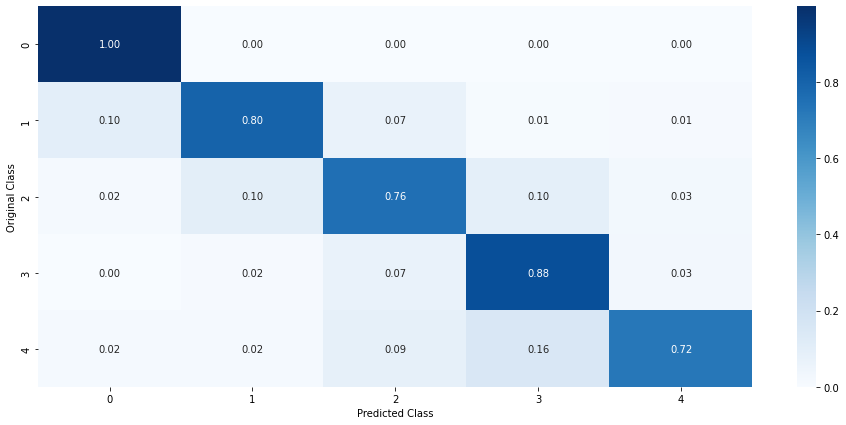

In [ ]:
labels = ['0', '1', '2', '3', '4']
cnf_matrix = confusion_matrix(df['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))

sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


#Resnet

In [ ]:
from keras.applications.resnet import ResNet152



#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

modelres152=ResNet152(weights='imagenet', include_top=False,input_shape=(256,256, 3))

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras import optimizers

x=GlobalAveragePooling2D()(modelres152.layers[-1].output)
x=Dropout(0.5)(x)
x=Dense(5, activation='softmax')(x)

model3=Model(inputs=modelres152.input,outputs=x)
model3.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_res.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
hist3=model3.fit(x=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

Epoch 1/40
228/228 [==============================] - 96s 356ms/step - loss: 0.8700 - accuracy: 0.6870 - kappa_metric: 0.6931 - val_loss: 1.6682 - val_accuracy: 0.4638 - val_kappa_metric: 0.0000e+00

Epoch 00001: val_kappa_metric improved from -inf to 0.00000, saving model to model/model_res.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
228/228 [==============================] - 79s 344ms/step - loss: 0.6575 - accuracy: 0.7587 - kappa_metric: 0.8134 - val_loss: 1.4907 - val_accuracy: 0.4441 - val_kappa_metric: -0.0255

Epoch 00002: val_kappa_metric did not improve from 0.00000
Epoch 3/40
228/228 [==============================] - 78s 343ms/step - loss: 0.6120 - accuracy: 0.7711 - kappa_metric: 0.8184 - val_loss: 1.2235 - val_accuracy: 0.5757 - val_kappa_metric: 0.3526

Epoch 00003: val_kappa_metric improved from 0.00000 to 0.35261, saving model to model/model_res.hdf5
Epoch 4/40
228/228 [==============================] - 79s 344ms/step - loss: 0.5648 - accuracy: 0.7901 - kappa_metric: 0.8545 - val_loss: 0.8228 - val_accuracy: 0.7193 - val_kappa_metric: 0.7018

Epoch 00004: val_kappa_metric improved from 0.35261 to 0.70182, saving model to model/model_res.hdf5
Epoch 5/40
228/228 [==============================] - 78s 343ms/step - loss: 0.5266 - accuracy: 0.8018 - kappa_metric: 0.8566 - val_loss: 0.5590 - val

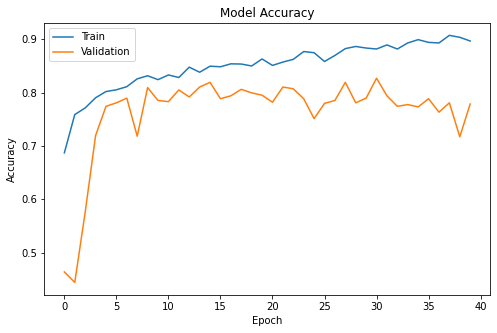

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [ ]:
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(dataframe=df,
                                                          directory = "prep",
                                                          x_col="add",
                                                          target_size=(256,256),
                                                          batch_size=1,
                                                          shuffle=False,
                                                          class_mode=None)

STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = model3.predict_generator(complete_generator, steps=STEP_SIZE_COMPLETE,verbose = 1)
train_preds = [np.argmax(pred) for pred in train_preds]

Found 3662 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3662/3662 [==============================] - 97s 26ms/step


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds, df['diagnosis'].astype('int'), weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score(df['diagnosis'].astype('int'),train_preds))

Train Cohen Kappa score: 0.910
Train Accuracy score : 0.844


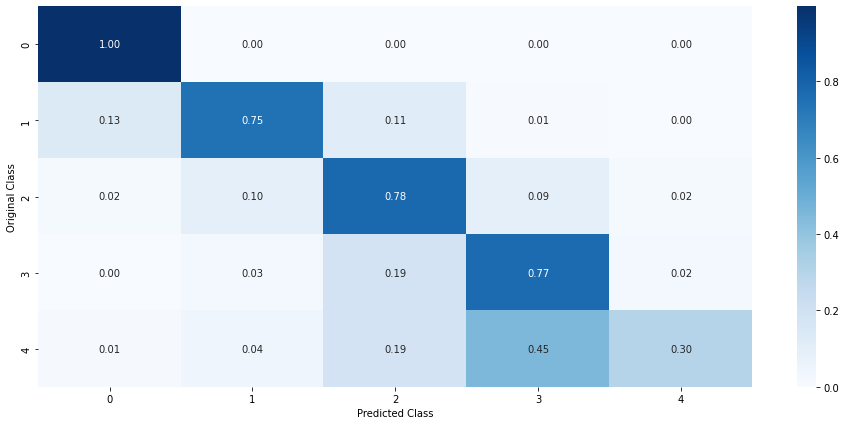

In [ ]:
labels = ['0', '1', '2', '3', '4']
cnf_matrix = confusion_matrix(df['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))

sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


#Efficientnet


In [ ]:
from keras.applications.efficientnet import EfficientNetB0, EfficientNetB3, EfficientNetB4,EfficientNetB7

##EfficientNetB0

In [ ]:
#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

modeleffB0=EfficientNetB0(weights='imagenet', include_top=False,input_shape=(256,256, 3))

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras import optimizers

x=GlobalAveragePooling2D()(modeleffB0.layers[-1].output)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(5, activation='softmax')(x)

model4=Model(inputs=modeleffB0.input,outputs=x)
model4.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_effb0.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 256, 256, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 256, 256, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
import tensorflow as tf

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
hist4=model4.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 114s 385ms/step - loss: 0.9443 - accuracy: 0.6578 - kappa_metric: 0.5955 - val_loss: 1.3753 - val_accuracy: 0.4638 - val_kappa_metric: 0.0000e+00

Epoch 00001: val_kappa_metric improved from -inf to 0.00000, saving model to model/model_effb0.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
228/228 [==============================] - 86s 378ms/step - loss: 0.6935 - accuracy: 0.7444 - kappa_metric: 0.7770 - val_loss: 1.2443 - val_accuracy: 0.5307 - val_kappa_metric: 0.2151

Epoch 00002: val_kappa_metric improved from 0.00000 to 0.21510, saving model to model/model_effb0.hdf5
Epoch 3/40
228/228 [==============================] - 86s 376ms/step - loss: 0.6266 - accuracy: 0.7656 - kappa_metric: 0.8080 - val_loss: 1.0310 - val_accuracy: 0.6349 - val_kappa_metric: 0.5191

Epoch 00003: val_kappa_metric improved from 0.21510 to 0.51912, saving model to model/model_effb0.hdf5
Epoch 4/40
228/228 [==============================] - 86s 377ms/step - loss: 0.5907 - accuracy: 0.7799 - kappa_metric: 0.8190 - val_loss: 4.5569 - val_accuracy: 0.4101 - val_kappa_metric: -0.0396

Epoch 00004: val_kappa_metric did not improve from 0.51912
Epoch 5/40
228/228 [==============================] - 86s 377ms/step - loss: 0.5455 - accuracy: 0.7927 - kappa_metric: 0.8489 - val_loss: 1.1281 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


228/228 [==============================] - 85s 372ms/step - loss: 0.2601 - accuracy: 0.9075 - kappa_metric: 0.9272 - val_loss: 2.9110 - val_accuracy: 0.5263 - val_kappa_metric: nan

Epoch 00025: val_kappa_metric did not improve from 0.71650
Epoch 26/40
228/228 [==============================] - 84s 369ms/step - loss: 0.2505 - accuracy: 0.9024 - kappa_metric: 0.9302 - val_loss: 1.9912 - val_accuracy: 0.6404 - val_kappa_metric: 0.4768

Epoch 00026: val_kappa_metric did not improve from 0.71650
Epoch 27/40
228/228 [==============================] - 84s 369ms/step - loss: 0.2392 - accuracy: 0.9126 - kappa_metric: 0.9406 - val_loss: 1.5648 - val_accuracy: 0.6634 - val_kappa_metric: 0.5390

Epoch 00027: val_kappa_metric did not improve from 0.71650
Epoch 28/40
228/228 [==============================] - 84s 370ms/step - loss: 0.2365 - accuracy: 0.9112 - kappa_metric: 0.9381 - val_loss: 1.3068 - val_accuracy: 0.6634 - val_kappa_metric: 0.6094

Epoch 00028: val_kappa_metric did not improve from

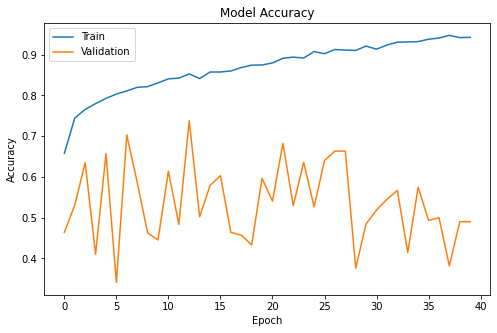

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

##EfficientNetB3

In [ ]:
#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

modeleffB3=EfficientNetB3(weights='imagenet', include_top=False,input_shape=(256,256, 3))

43950080/43941136 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras import optimizers

x=GlobalAveragePooling2D()(modeleffB3.layers[-1].output)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(5, activation='softmax')(x)

model4b3=Model(inputs=modeleffB3.input,outputs=x)
model4b3.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_effb0.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model4b3.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 256, 256, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 256, 256, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization_2[0][0]            
____________________________________________________________________________________________

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
hist4b3=model4b3.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 107s 394ms/step - loss: 0.9003 - accuracy: 0.6724 - kappa_metric: 0.6383 - val_loss: 1.6077 - val_accuracy: 0.4616 - val_kappa_metric: 0.0000e+00

Epoch 00001: val_kappa_metric improved from -inf to 0.00000, saving model to model/model_effb0.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
228/228 [==============================] - 88s 386ms/step - loss: 0.6448 - accuracy: 0.7620 - kappa_metric: 0.8105 - val_loss: 1.3699 - val_accuracy: 0.5066 - val_kappa_metric: 0.1406

Epoch 00002: val_kappa_metric improved from 0.00000 to 0.14062, saving model to model/model_effb0.hdf5
Epoch 3/40
228/228 [==============================] - 87s 381ms/step - loss: 0.5872 - accuracy: 0.7660 - kappa_metric: 0.8209 - val_loss: 1.3919 - val_accuracy: 0.4715 - val_kappa_metric: 0.0255

Epoch 00003: val_kappa_metric did not improve from 0.14062
Epoch 4/40
228/228 [==============================] - 86s 378ms/step - loss: 0.5320 - accuracy: 0.7960 - kappa_metric: 0.8570 - val_loss: 0.8604 - val_accuracy: 0.7029 - val_kappa_metric: 0.6680

Epoch 00004: val_kappa_metric improved from 0.14062 to 0.66800, saving model to model/model_effb0.hdf5
Epoch 5/40
228/228 [==============================] - 89s 389ms/step - loss: 0.4946 - accuracy: 0.8088 - kappa_metric: 0.8575 - val_loss: 1.4507 - 

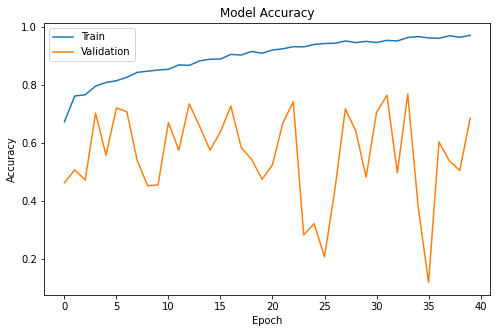

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist4b3.history['accuracy'])
plt.plot(hist4b3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

##EfficientNetB4

In [ ]:
#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

modeleffB4=EfficientNetB4(weights='imagenet', include_top=False,input_shape=(256,256, 3))

71696384/71686520 [==============================] - 1s 0us/step


In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras import optimizers

x=GlobalAveragePooling2D()(modeleffB4.layers[-1].output)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(5, activation='softmax')(x)

model4b4=Model(inputs=modeleffB4.input,outputs=x)
model4b4.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_effb0.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model4b4.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 256, 256, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 256, 256, 3)  7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization_3[0][0]            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
hist4b4=model4b4.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 113s 408ms/step - loss: 0.8641 - accuracy: 0.6793 - kappa_metric: 0.6686 - val_loss: 1.5061 - val_accuracy: 0.4671 - val_kappa_metric: 0.0108

Epoch 00001: val_kappa_metric improved from -inf to 0.01082, saving model to model/model_effb0.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
228/228 [==============================] - 89s 389ms/step - loss: 0.6539 - accuracy: 0.7572 - kappa_metric: 0.7996 - val_loss: 1.6619 - val_accuracy: 0.5789 - val_kappa_metric: 0.2652

Epoch 00002: val_kappa_metric improved from 0.01082 to 0.26522, saving model to model/model_effb0.hdf5
Epoch 3/40
228/228 [==============================] - 88s 387ms/step - loss: 0.5625 - accuracy: 0.7945 - kappa_metric: 0.8505 - val_loss: 2.2966 - val_accuracy: 0.5175 - val_kappa_metric: 0.1940

Epoch 00003: val_kappa_metric did not improve from 0.26522
Epoch 4/40
228/228 [==============================] - 88s 385ms/step - loss: 0.5330 - accuracy: 0.7949 - kappa_metric: 0.8575 - val_loss: 1.9458 - val_accuracy: 0.4857 - val_kappa_metric: 0.0547

Epoch 00004: val_kappa_metric did not improve from 0.26522
Epoch 5/40
228/228 [==============================] - 87s 382ms/step - loss: 0.5207 - accuracy: 0.8022 - kappa_metric: 0.8504 - val_loss: 2.3482 - val_accuracy: 0.4978 - val_kappa_metric: 0.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


228/228 [==============================] - 86s 376ms/step - loss: 0.1791 - accuracy: 0.9309 - kappa_metric: nan - val_loss: 1.5681 - val_accuracy: 0.6798 - val_kappa_metric: 0.6796

Epoch 00022: val_kappa_metric did not improve from 0.80810
Epoch 23/40
228/228 [==============================] - 86s 376ms/step - loss: 0.1484 - accuracy: 0.9455 - kappa_metric: 0.9563 - val_loss: 1.1354 - val_accuracy: 0.7029 - val_kappa_metric: 0.7362

Epoch 00023: val_kappa_metric did not improve from 0.80810
Epoch 24/40
228/228 [==============================] - 86s 375ms/step - loss: 0.1498 - accuracy: 0.9437 - kappa_metric: 0.9571 - val_loss: 1.8644 - val_accuracy: 0.6053 - val_kappa_metric: 0.6483

Epoch 00024: val_kappa_metric did not improve from 0.80810
Epoch 25/40
228/228 [==============================] - 86s 378ms/step - loss: 0.1442 - accuracy: 0.9514 - kappa_metric: 0.9642 - val_loss: 0.9803 - val_accuracy: 0.7478 - val_kappa_metric: 0.8336

Epoch 00025: val_kappa_metric improved from 0.8081

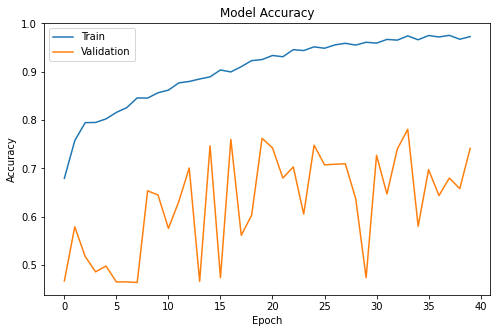

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist4b4.history['accuracy'])
plt.plot(hist4b4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

##EfficientNetB7

In [ ]:
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

modeleffB7=EfficientNetB7(weights='imagenet', include_top=False,input_shape=(256,256, 3))

258088960/258076736 [==============================] - 2s 0us/step


In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras import optimizers

x=GlobalAveragePooling2D()(modeleffB7.layers[-1].output)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(5, activation='softmax')(x)

model4b7=Model(inputs=modeleffB7.input,outputs=x)
model4b7.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_effb7.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model4b7.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 256, 256, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, 256, 256, 3)  7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization_4[0][0]            
____________________________________________________________________________________________

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
hist4b7=model4b7.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 202s 726ms/step - loss: 0.8566 - accuracy: 0.6874 - kappa_metric: 0.6842 - val_loss: 1.7434 - val_accuracy: 0.4638 - val_kappa_metric: 0.0000e+00

Epoch 00001: val_kappa_metric improved from -inf to 0.00000, saving model to model/model_effb7.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
228/228 [==============================] - 159s 698ms/step - loss: 0.6242 - accuracy: 0.7653 - kappa_metric: 0.8250 - val_loss: 1.2756 - val_accuracy: 0.5877 - val_kappa_metric: 0.3119

Epoch 00002: val_kappa_metric improved from 0.00000 to 0.31186, saving model to model/model_effb7.hdf5
Epoch 3/40
228/228 [==============================] - 160s 699ms/step - loss: 0.5640 - accuracy: 0.7857 - kappa_metric: 0.8466 - val_loss: 2.0599 - val_accuracy: 0.4748 - val_kappa_metric: 0.0933

Epoch 00003: val_kappa_metric did not improve from 0.31186
Epoch 4/40
228/228 [==============================] - 159s 699ms/step - loss: 0.4904 - accuracy: 0.8095 - kappa_metric: 0.8693 - val_loss: 0.5459 - val_accuracy: 0.7950 - val_kappa_metric: 0.8457

Epoch 00004: val_kappa_metric improved from 0.31186 to 0.84574, saving model to model/model_effb7.hdf5
Epoch 5/40
228/228 [==============================] - 160s 702ms/step - loss: 0.4695 - accuracy: 0.8208 - kappa_metric: 0.8810 - val_loss: 0.682

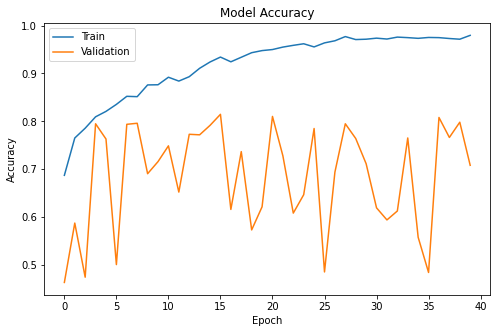

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist4b7.history['accuracy'])
plt.plot(hist4b7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [ ]:
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(dataframe=df,
                                                          directory = "prep",
                                                          x_col="add",
                                                          target_size=(256,256),
                                                          batch_size=1,
                                                          shuffle=False,
                                                          class_mode=None)

STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = model4b7.predict_generator(complete_generator, steps=STEP_SIZE_COMPLETE,verbose = 1)
train_preds = [np.argmax(pred) for pred in train_preds]

Found 3662 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3662/3662 [==============================] - 197s 52ms/step


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score

In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds, df['diagnosis'].astype('int'), weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score(df['diagnosis'].astype('int'),train_preds))

Train Cohen Kappa score: 0.877
Train Accuracy score : 0.838


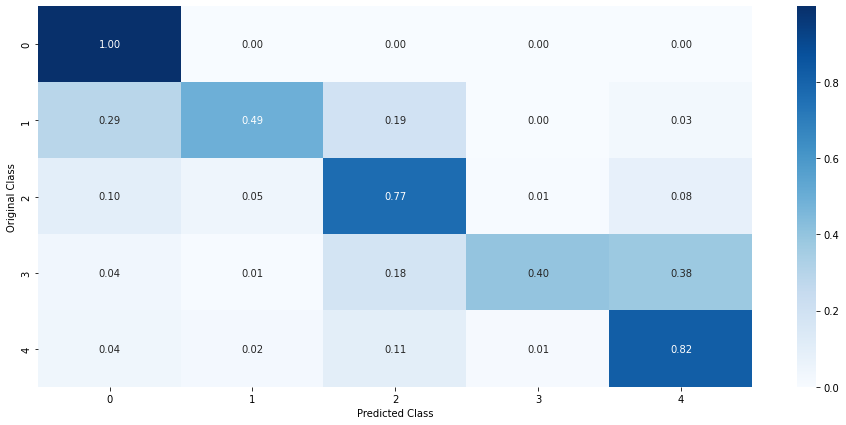

In [ ]:
labels = ['0', '1', '2', '3', '4']
cnf_matrix = confusion_matrix(df['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))

sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


#Xception

In [ ]:
#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras import optimizers

In [ ]:

from keras.applications.xception import Xception

#from tensorflow.keras.applications.vgg16 import VGG16
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

modelxcep=Xception(weights='imagenet', include_top=False,input_shape=(256,256, 3))
#print(modelxcep.summary())

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import regularizers
from tensorflow.keras import optimizers


x=GlobalAveragePooling2D()(modelxcep.layers[-1].output)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(5, activation='softmax')(x)

model5=Model(inputs=modelxcep.input,outputs=x)
model5.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])
filepath="model/model_xcep.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_kappa_metric', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model5.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
hist5=model5.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 90s 371ms/step - loss: 0.8426 - accuracy: 0.6969 - kappa_metric: 0.6827 - val_loss: 0.6491 - val_accuracy: 0.7566 - val_kappa_metric: 0.7975

Epoch 00001: val_kappa_metric improved from -inf to 0.79754, saving model to model/model_xcep.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
228/228 [==============================] - 85s 371ms/step - loss: 0.6320 - accuracy: 0.7620 - kappa_metric: 0.8193 - val_loss: 0.5860 - val_accuracy: 0.7763 - val_kappa_metric: 0.8457

Epoch 00002: val_kappa_metric improved from 0.79754 to 0.84569, saving model to model/model_xcep.hdf5
Epoch 3/40
228/228 [==============================] - 83s 364ms/step - loss: 0.5636 - accuracy: 0.7909 - kappa_metric: 0.8369 - val_loss: 0.5660 - val_accuracy: 0.7971 - val_kappa_metric: 0.8353

Epoch 00003: val_kappa_metric did not improve from 0.84569
Epoch 4/40
228/228 [==============================] - 82s 361ms/step - loss: 0.5103 - accuracy: 0.8018 - kappa_metric: 0.8536 - val_loss: 0.5728 - val_accuracy: 0.7774 - val_kappa_metric: 0.8448

Epoch 00004: val_kappa_metric did not improve from 0.84569
Epoch 5/40
228/228 [==============================] - 81s 357ms/step - loss: 0.4947 - accuracy: 0.8124 - kappa_metric: 0.8605 - val_loss: 0.5365 - val_accuracy: 0.8147 - val_kappa_metric: 0.86

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


228/228 [==============================] - 83s 362ms/step - loss: 0.1617 - accuracy: 0.9415 - kappa_metric: nan - val_loss: 0.7154 - val_accuracy: 0.7950 - val_kappa_metric: 0.8748

Epoch 00028: val_kappa_metric did not improve from 0.88765
Epoch 29/40
228/228 [==============================] - 83s 364ms/step - loss: 0.1246 - accuracy: 0.9528 - kappa_metric: 0.9684 - val_loss: 0.7480 - val_accuracy: 0.8015 - val_kappa_metric: 0.8630

Epoch 00029: val_kappa_metric did not improve from 0.88765
Epoch 30/40
228/228 [==============================] - 84s 369ms/step - loss: 0.1168 - accuracy: 0.9572 - kappa_metric: 0.9664 - val_loss: 0.7782 - val_accuracy: 0.8026 - val_kappa_metric: 0.8862

Epoch 00030: val_kappa_metric did not improve from 0.88765
Epoch 31/40
228/228 [==============================] - 86s 378ms/step - loss: 0.1316 - accuracy: 0.9554 - kappa_metric: 0.9708 - val_loss: 0.7755 - val_accuracy: 0.7982 - val_kappa_metric: 0.8514

Epoch 00031: val_kappa_metric did not improve from

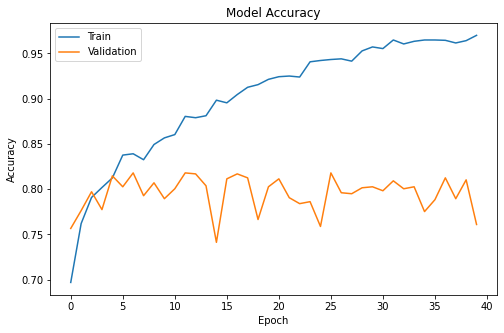

In [ ]:

# ref - https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
plt.figure(figsize=(8,5))

plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [ ]:
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(dataframe=df,
                                                          directory = "prep",
                                                          x_col="add",
                                                          target_size=(256,256),
                                                          batch_size=1,
                                                          shuffle=False,
                                                          class_mode=None)

STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = model5.predict_generator(complete_generator, steps=STEP_SIZE_COMPLETE,verbose = 1)
train_preds = [np.argmax(pred) for pred in train_preds]

Found 3662 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3662/3662 [==============================] - 42s 11ms/step


In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds, df['diagnosis'].astype('int'), weights='quadratic'))
print("Train Accuracy score : %.3f" % accuracy_score(df['diagnosis'].astype('int'),train_preds))

Train Cohen Kappa score: 0.925
Train Accuracy score : 0.854


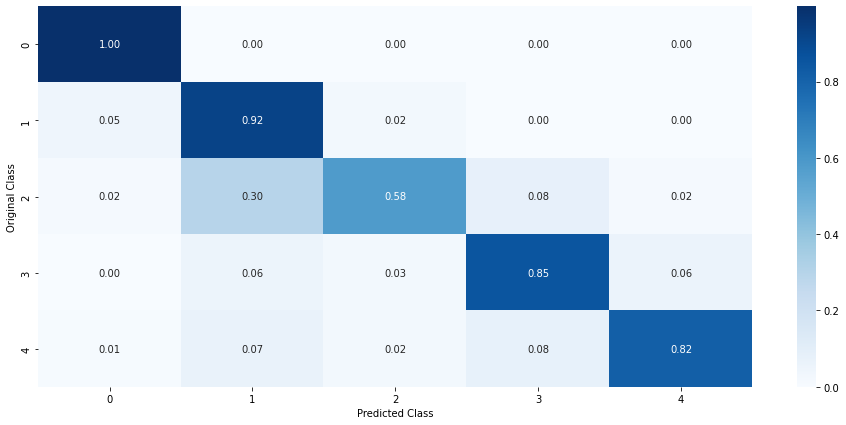

In [ ]:
labels = ['0', '1', '2', '3', '4']
cnf_matrix = confusion_matrix(df['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))

sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


In [ ]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model","Kappa Score","Accuracy Score"]
x.add_row(["Custom Model",0.554,0.61])
x.add_row(["VGG-16",0.913,0.817])
x.add_row(["DenseNet",0.933,0.884])
x.add_row(["ResNet",0.910,0.844])
x.add_row(["EfficientNetB7",0.877,0.838])
x.add_row(["Xception",0.925,.854])

print(x)

+----------------+-------------+----------------+
|     Model      | Kappa Score | Accuracy Score |
+----------------+-------------+----------------+
|  Custom Model  |    0.554    |      0.61      |
|     VGG-16     |    0.913    |     0.817      |
|    DenseNet    |    0.933    |     0.884      |
|     ResNet     |     0.91    |     0.844      |
| EfficientNetB7 |    0.877    |     0.838      |
|    Xception    |    0.925    |     0.854      |
+----------------+-------------+----------------+


From above I chose DenseNet as my best model because of highest kappa score among the models.

In [25]:
from keras.models import load_model
from sklearn.metrics import cohen_kappa_score,accuracy_score
from keras_preprocessing.image import ImageDataGenerator

def kappa(y_true, y_pred):
  y_true = np.argmax(y_true, axis=-1)
  y_pred = np.argmax(y_pred, axis=-1)
  kappa_score = cohen_kappa_score(y_true, y_pred, weights='quadratic')
  return kappa_score

def kappa_metric(y_true, y_pred):
  kappa_score = tf.py_function(func=kappa, inp=[y_true, y_pred], Tout=tf.float32)
  return kappa_score

In [26]:
#loading our best model
model=load_model('model_dense.hdf5',custom_objects={"kappa_metric":kappa_metric})

Prediction using my best model

In [27]:
X='/content/00a8624548a9.png'
img = cv2.imread(X)
img=crop(img)
img = cv2.resize(img,(256,256),interpolation=cv2.INTER_AREA)
img=circlecrop(img)
img=ben(img)
img = np.reshape(img,[1,256,256,3])
cd = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                          rotation_range=360,brightness_range=[0.5, 1],
                           zoom_range = 0.2,rescale=1./255)
cg = cd.flow(img,batch_size=1)
tp = model.predict(cg)
op=np.argmax(tp)
if op==0:
  matter="Stage 0 - No Diabetic Retinopathy"
elif op==1:
  matter="Stage 1 - Mild"
elif op==2:
  matter="Stage 2 - Moderate"
elif op==3:
  matter="Stage 3 - Severe"
elif op==4:
  matter="Stage 4 - Proliferative Diabetic Retinopathy"
print(matter)

Stage 2 - Moderate


In [33]:
print(tp)
print(int(np.max(tp)*100))

[[0.0009531  0.01447518 0.9211248  0.00197273 0.06147409]]
92


#Model Quantization

Quantization helps to reduce the model size and also makes models compatible to run on devices.

In [ ]:
def get_file_size(file_path):
  size = os.path.getsize(file_path)
  return size

In [ ]:
def convert_bytes(size, unit=None):
  if unit == "KB":
    return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
  elif unit == "MB":
    return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
  else:
    return print('File size: ' + str(size) + ' bytes')

In [ ]:
md='model_dense.hdf5'

In [ ]:
convert_bytes(get_file_size(md), "MB")

File size: 81.986 Megabytes


Our model has size of 82 MB

In [ ]:
import tensorflow as tf

In [ ]:
model.evaluate(valid_generator)

77/77 [==============================] - 36s 254ms/step - loss: 0.5973 - accuracy: 0.8044 - kappa_metric: 0.8652


[0.5973092913627625, 0.8043715953826904, 0.8651814460754395]

##Implementing post training quantization

ref - https://github.com/bhattbhavesh91/tflite-tutorials/blob/master/tflite-part-2.ipynb

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = tf_lite_converter.convert()


INFO:tensorflow:Assets written to: /tmp/tmp8b0hfujo/assets


INFO:tensorflow:Assets written to: /tmp/tmp8b0hfujo/assets


In [ ]:
with open("tflite_model.tflite", 'wb') as f:
    f.write(tflite_model)

In [ ]:
tm='tflite_model.tflite'

In [ ]:
convert_bytes(get_file_size(tm), "MB")

File size: 7.147 Megabytes


When we implement tflite quantization our file size got reduced to 7 MB

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details= interpreter.get_output_details()
interpreter.resize_tensor_input(input_details[0]['index'],(12, 256, 256, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (12,5))
interpreter.allocate_tensors()

In [ ]:
image_batch, label_batch = next(iter(valid_generator))

In [ ]:
image_batch, label_batch = next(iter(valid_generator))
interpreter.set_tensor(input_details[0]['index'], image_batch)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
prediction_classes = np.argmax(tflite_results, axis=1)
img_classes = np.argmax(label_batch, axis=1)
print(img_classes)
print(prediction_classes)

[0 0 0 3 1 0 0 2 0 2 0 0]
[0 0 0 2 2 0 0 2 0 2 0 0]


In [ ]:
kp=cohen_kappa_score(img_classes,prediction_classes,weights='quadratic')

In [ ]:
print(kp)

0.9142857142857143


Using tflite quantization we obtain quadratic kappa score of 0.91

##Implementing quantization aware training

ref - https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/49_quantization/quantization.ipynb

In [ ]:
pip install tensorflow_model_optimization

     |████████████████████████████████| 213 kB 8.0 MB/s 


In [ ]:
def apply_quantization_to_dense(layer):
  if isinstance(layer, tf.keras.layers.Dense):
    return tfmot.quantization.keras.quantize_annotate_layer(layer)
  return layer

annotated_model = tf.keras.models.clone_model(
    model,
    clone_function=apply_quantization_to_dense,
)

quant_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)
quant_aware_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[1][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[1][0]                 
______________________________________________________________________________________________

In [ ]:
quant_aware_model.compile(optimizer=optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy",kappa_metric])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
histq=quant_aware_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
228/228 [==============================] - 89s 341ms/step - loss: 0.3482 - accuracy: 0.8684 - kappa_metric: 0.9012 - val_loss: 0.5252 - val_accuracy: 0.8125 - val_kappa_metric: 0.8763
Epoch 2/40
228/228 [==============================] - 76s 331ms/step - loss: 0.3060 - accuracy: 0.8804 - kappa_metric: 0.9201 - val_loss: 0.6306 - val_accuracy: 0.7829 - val_kappa_metric: 0.8462
Epoch 3/40
228/228 [==============================] - 75s 331ms/step - loss: 0.3089 - accuracy: 0.8892 - kappa_metric: 0.9242 - val_loss: 0.5598 - val_accuracy: 0.8059 - val_kappa_metric: 0.8650
Epoch 4/40
228/228 [==============================] - 76s 331ms/step - loss: 0.2797 - accuracy: 0.9002 - kappa_metric: 0.9339 - val_loss: 0.5878 - val_accuracy: 0.7895 - val_kappa_metric: 0.8631
Epoch 5/40
228/228 [==============================] - 75s 330ms/step - loss: 0.2867 - accuracy: 0.8947 - kappa_metric: 0.9264 - val_loss: 0.9791 - val_accuracy: 0.7182 - val_kappa_metric: 0.8108
Epoch 6/40
228/228 [=====

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


228/228 [==============================] - 76s 333ms/step - loss: 0.1815 - accuracy: 0.9305 - kappa_metric: 0.9519 - val_loss: 0.6940 - val_accuracy: 0.8026 - val_kappa_metric: nan
Epoch 20/40
228/228 [==============================] - 76s 333ms/step - loss: 0.1673 - accuracy: 0.9408 - kappa_metric: 0.9529 - val_loss: 0.8011 - val_accuracy: 0.7917 - val_kappa_metric: 0.8564
Epoch 21/40
228/228 [==============================] - 76s 335ms/step - loss: 0.1608 - accuracy: 0.9393 - kappa_metric: 0.9586 - val_loss: 0.7846 - val_accuracy: 0.7917 - val_kappa_metric: 0.8592
Epoch 22/40
228/228 [==============================] - 77s 336ms/step - loss: 0.1632 - accuracy: 0.9378 - kappa_metric: 0.9574 - val_loss: 0.7804 - val_accuracy: 0.7697 - val_kappa_metric: 0.8612
Epoch 23/40
228/228 [==============================] - 76s 334ms/step - loss: 0.1631 - accuracy: 0.9422 - kappa_metric: 0.9619 - val_loss: 0.8443 - val_accuracy: 0.7982 - val_kappa_metric: 0.8649
Epoch 24/40
228/228 [==============

In [ ]:
quant_aware_model.evaluate(valid_generator)

77/77 [==============================] - 19s 247ms/step - loss: 0.8523 - accuracy: 0.8251 - kappa_metric: 0.8921


[0.8523126244544983, 0.8251366019248962, 0.8920950889587402]

In [ ]:
quant_aware_model.save('qmodel.h5')

In [ ]:
qd='qmodel.h5'

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp5v62ug1v/assets


INFO:tensorflow:Assets written to: /tmp/tmp5v62ug1v/assets


In [ ]:
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)

In [ ]:
tfmd="tflite_qaware_model.tflite"

In [ ]:
convert_bytes(get_file_size(tfmd), "MB")

File size: 26.613 Megabytes


In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_qaware_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details= interpreter.get_output_details()
interpreter.resize_tensor_input(input_details[0]['index'],(12, 256, 256, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (12,5))
interpreter.allocate_tensors()

In [ ]:
image_batch, label_batch = next(iter(valid_generator))
interpreter.set_tensor(input_details[0]['index'], image_batch)
interpreter.invoke()
tflite_qresults = interpreter.get_tensor(output_details[0]['index'])
prediction_classes = np.argmax(tflite_qresults, axis=1)

In [ ]:
img_classes = np.argmax(label_batch, axis=1)
print(img_classes)
print(prediction_classes)
kps=cohen_kappa_score(img_classes,prediction_classes,weights='quadratic')
print(kps)

[0 2 1 2 0 0 2 0 2 0 0 1]
[0 2 1 2 0 0 2 0 2 0 0 2]
0.9516129032258065


by using quantization aware training we get quadratic kappa score of 0.95

#Deploying my best model

In [45]:
!pip install flask-ngrok

In [46]:
import numpy as np
from flask import Flask, request, render_template
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
import pickle
from keras.models import load_model
import cv2
import numpy as np
  
@app.route("/")
def home():
  return render_template('index.html')

@app.route('/predok',methods=['POST','GET'])
def predok():
  if request.method == 'POST':
    inp=request.files['file']
    inp.save(inp.filename)  
#    inp.save(os.path.join(app.config["IMAGE_UPLOADS"], inp.filename))
    input=inp.filename

    img = cv2.imread(input)
    img=crop(img)
    img = cv2.resize(img,(256,256),interpolation=cv2.INTER_AREA)
    img=circlecrop(img)
    img=ben(img)
    img = np.reshape(img,[1,256,256,3])
    cd = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                          rotation_range=360,brightness_range=[0.5, 1],
                           zoom_range = 0.2,rescale=1./255)
    cg = cd.flow(img,batch_size=1)
    tp = model.predict(cg)
    pr=int(np.max(tp)*100)
    op=np.argmax(tp)
    if op==0:
      matter="Stage 0 - No Diabetic Retinopathy"
    elif op==1:
      matter="Stage 1 - Mild"
    elif op==2:
      matter="Stage 2 - Moderate"
    elif op==3:
      matter="Stage 3 - Severe"
    elif op==4:
      matter="Stage 4 - Proliferative Diabetic Retinopathy"

    return render_template('predok.html',output="{1} percent probability of {0} color blindness".format(matter,pr))


In [47]:
run_with_ngrok(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://322c-104-196-213-196.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
 * Running on http://322c-104-196-213-196.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [11/Oct/2021 18:26:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2021 18:26:38] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [11/Oct/2021 18:26:48] "POST /predok HTTP/1.1" 200 -


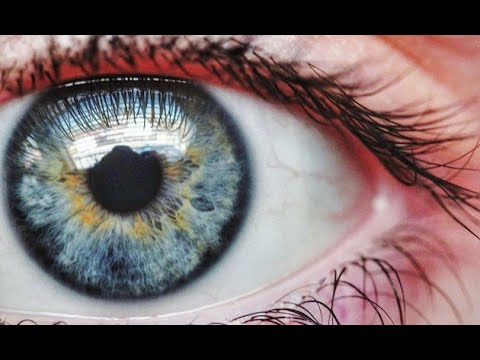

In [52]:
from IPython.display import YouTubeVideo

YouTubeVideo('isohxkc3YjU', width=800, height=400)